# Rodar inicialmente

In [9]:
from numpy import ones,copy,cos,tan,pi,linspace

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Exercício 1



Vamos plotar a função $f(x) = e^{-x^2}$

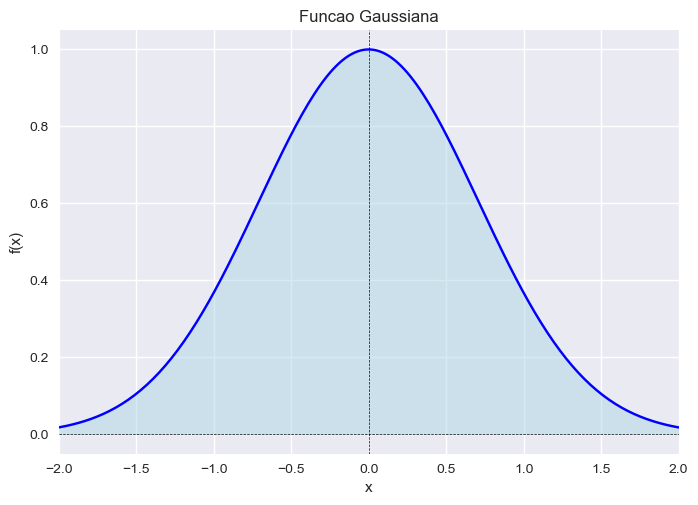

In [12]:
def egh(x):
    return np.exp(-x**2)

x = linspace(-10,10,1000)

plt.plot(x,egh(x),label='e^(-x^2)',color='blue')
plt.title('Funcao Gaussiana')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(-2,2)
plt.style.use('seaborn-v0_8')
plt.axhline(0,color='black',linewidth=0.5,linestyle='--')
plt.axvline(0,color='black',linewidth=0.5,linestyle='--')
plt.fill_between(x,egh(x),where=(x>=-10) & (x<=10),color='lightblue',alpha=0.5)
plt.show()

In [37]:
Intergal_real = sp.integrate(sp.E**(-1*sp.Symbol('x')**2), (sp.Symbol('x'), -1, 1))
print(f"Integral real: {Intergal_real.evalf()}")

Integral real: 1.49364826562485


### Método dos trapezios



In [ ]:
import base64
from IPython.display import Image, display

def mm(graph):
    graphbytes = graph.encode('utf-8')
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode('ascii')
    display(Image(url="https://mermaid.ink/img/" + base64_string))

diagrama="""
graph TD
    subgraph "Fluxograma da Função trapezio"
        A(["Início da Função"]) --> B{"Calcular a largura do subintervalo:<br>h = (b - a) / n"};
        B --> C{"Inicializar a soma com as extremidades:<br>soma = 0.5 * (f(a) + f(b))"};
        C --> D{"Inicializar contador do laço:<br>i = 1"};
        D --> E{"i < n ?"};
        E -- "Sim" --> F{"Adicionar ponto intermediário à soma:<br>soma = soma + f(a + i * h)"};
        F --> G{"Incrementar contador:<br>i = i + 1"};
        G --> E;
        E -- "Não" --> H{"Calcular o valor final da integral:<br>integral = soma * h"};
        H --> I{"Retornar o valor de 'integral'"};
        I --> J(["Fim da Função"]);
    end
"""

mm(diagrama)

In [38]:
# Função para o método dos trapézios
def trapezio(f, a, b, n):
    """
    Aproxima a integral de uma função f no intervalo [a, b] usando o método dos trapézios.
    
    Parâmetros:
    f: função a ser integrada.
    a: limite inferior da integral.
    b: limite superior da integral.
    n: número de subintervalos.
    
    Retorna:
    Aproximação da integral definida de f de a a b.
    """
    # Comprimento do intervalo dividido por n
    h = (b - a) / n
    
    # Soma inicial com as contribuições das extremidades
    soma = 0.5 * (f(a) + f(b))
    
    # Soma as contribuições dos pontos intermediários
    for i in range(1, n):
        soma += f(a + i * h)
    
    # Multiplica pela largura do intervalo dividido
    integral = soma * h
    return integral

# Definir limites e número de subintervalos
a = -1  # Limite inferior
b = 1  # Limite superior
n = 1000  # Número de subintervalos

def f(x):
    return np.exp(-x**2)

# Calcular a integral usando o método dos trapézios
resultado_trapezio = trapezio(f, a, b, n)

print(f"numero de subintervalos: {n}")
print(f"A aproximação da integral é: {resultado_trapezio}")
print(f"A integral real é: {Intergal_real.evalf()}")
# Calcular o erro

erro = abs(resultado_trapezio - Intergal_real.evalf())
print(f"O erro da aproximação é: {erro}")


numero de subintervalos: 1000
A aproximação da integral é: 1.4936477751188677
A integral real é: 1.49364826562485
O erro da aproximação é: 4.90505986272538E-7


### Método de Simpson

In [26]:
import base64
from IPython.display import Image, display

def mm(graph):
    graphbytes = graph.encode('utf-8')
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode('ascii')
    display(Image(url="https://mermaid.ink/img/" + base64_string))

diagrama="""
graph TD
    subgraph "Fluxograma da Função simpson"
        A(["'Início da Função'"]) --> B{"'n é par?'"};
        B -- "'Não'" --> C{"'Lançar Erro:<br>O número de subintervalos n deve ser par.'"};
        C --> D(["'Fim por Erro'"]);
        
        B -- "'Sim'" --> E{"'Calcular h = (b - a) / n'"};
        E --> F{"'Inicializar soma = f(a) + f(b)'"};
        
        F --> G{"'Laço 1: Para i de 1 até n, com passo 2'"};
        G -- "'Para cada i ímpar'" --> H{"'soma = soma + 4 * f(a + i * h)'"};
        H --> I{"'Fim do Laço 1'"};
        
        I --> J{"'Laço 2: Para i de 2 até n, com passo 2'"};
        J -- "'Para cada i par'" --> K{"'soma = soma + 2 * f(a + i * h)'"};
        K --> L{"'Fim do Laço 2'"};
        
        L --> M{"'Calcular integral = soma * h / 3'"};
        M --> N{"'Retornar integral'"};
        N --> O(["'Fim com Sucesso'"]);
    end
"""

mm(diagrama)

In [41]:
# Função para o método de Simpson de segunda ordem
def simpson(f, a, b, n):
    """
    Aproxima a integral de uma função f no intervalo [a, b] usando o método de Simpson de segunda ordem (1/3).
    
    Parâmetros:
    f: função a ser integrada.
    a: limite inferior da integral.
    b: limite superior da integral.
    n: número de subintervalos (deve ser par).
    
    Retorna:
    Aproximação da integral definida de f de a a b.
    """
    if n % 2 == 1:  # Verifica se n é par
        raise ValueError("O número de subintervalos n deve ser par.")
    
    h = (b - a) / n  # Comprimento de cada subintervalo
    
    # Soma inicial com as contribuições das extremidades
    soma = f(a) + f(b)
    
    # Soma as contribuições dos pontos ímpares (multiplicados por 4)
    for i in range(1, n, 2):
        soma += 4 * f(a + i * h)
    
    # Soma as contribuições dos pontos pares (multiplicados por 2)
    for i in range(2, n, 2):
        soma += 2 * f(a + i * h)
    
    # Multiplica pela largura do intervalo dividido por 3
    integral = soma * h / 3
    return integral

def f(x):
    return np.exp(-x**2)

# Definir limites e número de subintervalos (deve ser par)
a = -1  # Limite inferior
b = 1  # Limite superior
n = 1000  # Número de subintervalos (deve ser par)

# Calcular a integral aproximada usando o método de Simpson
resultado_aproximado = simpson(f, a, b, n)

# Calcular o erro absoluto
erro_absoluto = abs(resultado_aproximado - Intergal_real.evalf())

# Exibir os resultados
print(f"numero de subintervalos: {n}")
print(f"Aproximação da integral (Simpson): {resultado_aproximado}")
print(f"Erro absoluto: {erro_absoluto}")


numero de subintervalos: 1000
Aproximação da integral (Simpson): 1.4936482656251162
Erro absoluto: 2.62234678416462E-13


### Método Adaptativo de Simpson

In [28]:
import base64
from IPython.display import Image, display

def mm(graph):
    graphbytes = graph.encode('utf-8')
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode('ascii')
    display(Image(url="https://mermaid.ink/img/" + base64_string))

diagrama="""
graph TD
    subgraph "Fluxograma da Função Principal simpson_adaptativo"
        A(["'Início da Função'"]);
        B{"'Inicializar subdivisoes = 0'"};
        C{"'Definir funções internas:<br>- simpson_1_3(f, a, b)<br>- adaptativo(...)'"};
        D[["'Chamar função recursiva adaptativo(f, a, b, ...)<br>e armazenar o resultado'"]];
        E{"'Retornar resultado e subdivisoes'"};
        F(["'Fim da Função'"]);

        A --> B --> C --> D --> E --> F;
    end
"""

mm(diagrama)

In [44]:
def simpson_adaptativo(f, a, b, epsilon, n_max=100):
    """
    Aproxima a integral de uma função f no intervalo [a, b] usando o método adaptativo de Simpson.
    
    Parâmetros:
    f: função a ser integrada.
    a: limite inferior da integral.
    b: limite superior da integral.
    epsilon: erro tolerado (critério de parada).
    n_max: número máximo de subdivisões recursivas (limite para evitar recursão infinita).
    
    Retorna:
    Aproximação da integral definida de f de a a b, e o número de subdivisões feitas.
    """
    # Contador de subdivisões
    subdivisoes = 0
    
    # Função interna para calcular a integral usando Simpson no intervalo [a, b]
    def simpson_1_3(f, a, b):
        c = (a + b) / 2
        h = b - a
        return (h / 6) * (f(a) + 4*f(c) + f(b))
    
    # Função recursiva para o método adaptativo
    def adaptativo(f, a, b, epsilon, integral_total, n_max):
        nonlocal subdivisoes  # Acessa o contador externo
        
        c = (a + b) / 2
        
        # Aproximação usando o método de Simpson para o intervalo [a, b]
        integral_ab = simpson_1_3(f, a, b)
        
        # Aproximações para os subintervalos [a, c] e [c, b]
        integral_ac = simpson_1_3(f, a, c)
        integral_cb = simpson_1_3(f, c, b)
        
        # Se a soma das integrais dos subintervalos for suficientemente precisa, aceitamos
        if abs(integral_ac + integral_cb - integral_ab) < 15 * epsilon:
            subdivisoes += 1  # Incrementa o contador de subdivisões
            return integral_ac + integral_cb
        # Caso contrário, subdividimos ainda mais
        elif n_max > 0:
            subdivisoes += 2  # Subdividiu duas vezes (uma para [a, c] e uma para [c, b])
            left_integral = adaptativo(f, a, c, epsilon / 2, integral_total, n_max - 1)
            right_integral = adaptativo(f, c, b, epsilon / 2, integral_total, n_max - 1)
            return left_integral + right_integral
        else:
            return integral_ac + integral_cb
    
    # Começar a recursão com a integral total
    integral_aproximada = adaptativo(f, a, b, epsilon, 0, n_max)
    
    return integral_aproximada, subdivisoes

# Exemplo de função a ser integrada
def f(x):
    return x**2  # Exemplo de função x^2

# Definir limites e erro tolerado
a = -1  # Limite inferior
b = 1  # Limite superior
epsilon = 1e-7  # Erro tolerado


def f(x):
    return np.exp(-x**2)

# Calcular a integral aproximada usando o método adaptativo de Simpson
resultado_aproximado,n = simpson_adaptativo(f, a, b, epsilon)

# Calcular o erro absoluto
erro_absoluto = abs(resultado_aproximado - Intergal_real.evalf())

# Exibir os resultados
print(f"Numero de subdivisões: {n}")
print(f"Aproximação da integral (Adaptativo de Simpson): {resultado_aproximado}")
print(f"Valor exato da integral: {Intergal_real.evalf()}")
print(f"Erro absoluto: {erro_absoluto}")


Numero de subdivisões: 58
Aproximação da integral (Adaptativo de Simpson): 1.4936482543524008
Valor exato da integral: 1.49364826562485
Erro absoluto: 1.12724531931008E-8


# Exercício 2

### Plote da função

<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8352\142833257.py:8: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel(f'$\Psi(r)$')


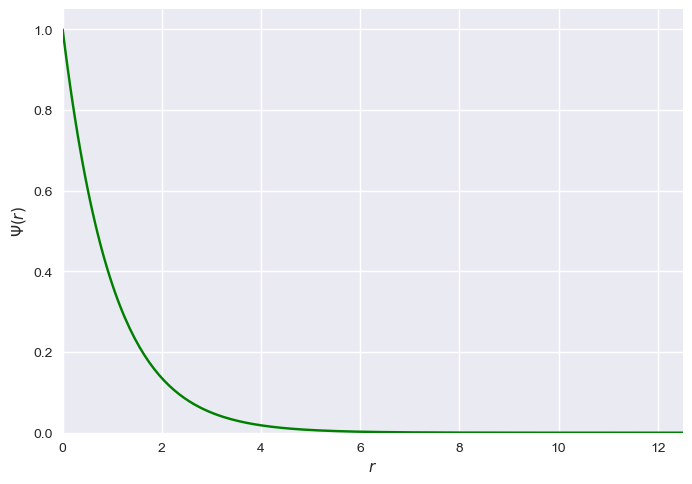

In [52]:
def psi(r):
    return np.exp(-r)

r = linspace(0,50,1000)

plt.plot(r,psi(r),color='green',label='1/π e^(-r)')
plt.xlabel(f'$r$')
plt.ylabel(f'$\Psi(r)$')
plt.xlim(0,12.5)
plt.ylim(0)
plt.style.use('seaborn-v0_8')
plt.show()

<>:8: SyntaxWarning: invalid escape sequence '\P'
<>:8: SyntaxWarning: invalid escape sequence '\P'
C:\Users\luiz.daniel\AppData\Local\Temp\ipykernel_8352\1228044596.py:8: SyntaxWarning: invalid escape sequence '\P'
  plt.ylabel(f'$|\Psi(r)|^2$')


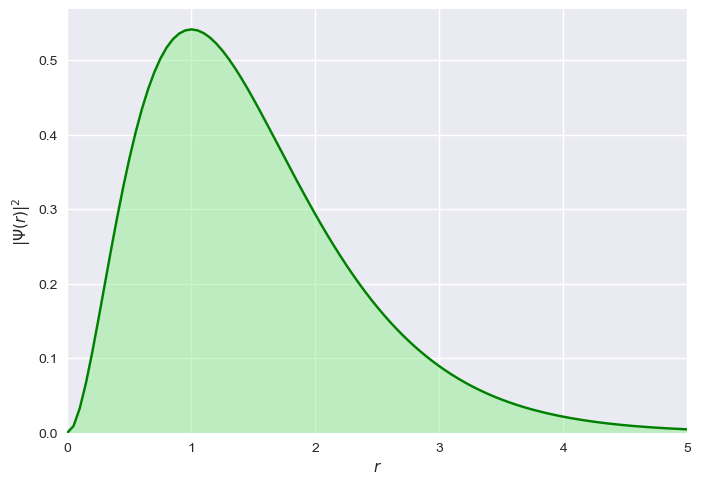

In [53]:
def probability_density(r):
    return 4*r**2*np.exp(-2*r)

r = linspace(0,50,1000)

plt.plot(r,probability_density(r),color='green',label='1/π e^(-r)')
plt.xlabel(f'$r$')
plt.ylabel(f'$|\Psi(r)|^2$')
plt.xlim(0,5)
plt.ylim(0)
plt.style.use('seaborn-v0_8')
plt.fill_between(r,probability_density(r),where=(r>=0) & (r<=50),color='lightgreen',alpha=0.5)
plt.show()

### Calcular a normaização da densidade de probabilidade

In [29]:
import base64
from IPython.display import Image, display

def mm(graph):
    graphbytes = graph.encode('utf-8')
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode('ascii')
    display(Image(url="https://mermaid.ink/img/" + base64_string))

diagrama="""
graph TD
    subgraph "Fluxograma da Função quadratura_gaussiana"
        A(["'Início da Função (funcao, a, b, n)'"]);
        B{"'Obter nós (x_i) e pesos (w_i) para o grau n<br>usando np.polynomial.legendre.leggauss(n)'"};
        C{"'Mapear os nós do intervalo [-1, 1] para o intervalo [a, b]<br>nos_mapeados = 0.5*(b-a)*nos + 0.5*(b+a)'"};
        D{"'Avaliar a função 'funcao' em cada um dos 'nos_mapeados'<br>valores_funcao = funcao(nos_mapeados)'"};
        E{"'Calcular a integral pela soma ponderada:<br>integral = 0.5*(b-a) * Σ(pesos * valores_funcao)'"};
        F{"'Retornar o valor final da integral'"};
        G(["'Fim da Função'"]);

        A --> B --> C --> D --> E --> F --> G;
    end
"""

mm(diagrama)

In [ ]:
def simpson_adaptativo(f, a, b, epsilon, n_max=10000):
    """
    Aproxima a integral de uma função f no intervalo [a, b] usando o método adaptativo de Simpson.
    
    Parâmetros:
    f: função a ser integrada.
    a: limite inferior da integral.
    b: limite superior da integral.
    epsilon: erro tolerado (critério de parada).
    n_max: número máximo de subdivisões recursivas (limite para evitar recursão infinita).
    
    Retorna:
    Aproximação da integral definida de f de a a b, e o número de subdivisões feitas.
    """
    # Contador de subdivisões
    subdivisoes = 0
    
    # Função interna para calcular a integral usando Simpson no intervalo [a, b]
    def simpson_1_3(f, a, b):
        c = (a + b) / 2
        h = b - a
        return (h / 6) * (f(a) + 4*f(c) + f(b))
    
    # Função recursiva para o método adaptativo
    def adaptativo(f, a, b, epsilon, integral_total, n_max):
        nonlocal subdivisoes  # Acessa o contador externo
        
        c = (a + b) / 2
        
        # Aproximação usando o método de Simpson para o intervalo [a, b]
        integral_ab = simpson_1_3(f, a, b)
        
        # Aproximações para os subintervalos [a, c] e [c, b]
        integral_ac = simpson_1_3(f, a, c)
        integral_cb = simpson_1_3(f, c, b)
        
        # Se a soma das integrais dos subintervalos for suficientemente precisa, aceitamos
        if abs(integral_ac + integral_cb - integral_ab) < 15 * epsilon:
            subdivisoes += 1  # Incrementa o contador de subdivisões
            return integral_ac + integral_cb
        # Caso contrário, subdividimos ainda mais
        elif n_max > 0:
            subdivisoes += 2  # Subdividiu duas vezes (uma para [a, c] e uma para [c, b])
            left_integral = adaptativo(f, a, c, epsilon / 2, integral_total, n_max - 1)
            right_integral = adaptativo(f, c, b, epsilon / 2, integral_total, n_max - 1)
            return left_integral + right_integral
        else:
            return integral_ac + integral_cb
    
    # Começar a recursão com a integral total
    integral_aproximada = adaptativo(f, a, b, epsilon, 0, n_max)
    
    return integral_aproximada, subdivisoes

def quadratura_gaussiana(funcao, a, b, n):
    """
    Calcula a integral definida de uma função 'funcao' de 'a' até 'b'
    usando o método da Quadratura Gaussiana com 'n' pontos.

    Args:
        funcao (callable): A função a ser integrada. Deve aceitar um argumento numérico.
        a (float): O limite inferior de integração.
        b (float): O limite superior de integração.
        n (int): O número de pontos (ordem da quadratura).

    Returns:
        float: O valor aproximado da integral.
    """
    # 1. Obter os nós (raízes) e pesos do Polinômio de Legendre de grau n
    # A função leggauss retorna os nós no intervalo [-1, 1]
    nos, pesos = np.polynomial.legendre.leggauss(n)

    # 2. Aplicar a mudança de variável para mapear os nós do intervalo [-1, 1]
    # para o intervalo [a, b].
    # A fórmula é: t = (b-a)/2 * x + (b+a)/2
    nos_mapeados = 0.5 * (b - a) * nos + 0.5 * (b + a)

    # 3. Avaliar a função nos nós mapeados
    valores_funcao = funcao(nos_mapeados)

    # 4. Calcular a integral usando a soma ponderada
    # A integral é a soma dos pesos multiplicados pelos valores da função,
    # tudo multiplicado pelo fator de escala da mudança de intervalo.
    integral = 0.5 * (b - a) * np.sum(pesos * valores_funcao)

    return integral

def integrar_com_estimativa_erro(funcao, a, b, n_inicial=5, tolerancia=1e-9, max_iter=10000):
    """
    Calcula a integral de uma função até que a estimativa de erro seja
    menor que a tolerância especificada.

    Args:
        funcao (callable): A função a ser integrada.
        a (float): O limite inferior de integração.
        b (float): O limite superior de integração.
        n_inicial (int): O número inicial de pontos de Gauss.
        tolerancia (float): A tolerância de erro desejada.
        max_iter (int): Número máximo de iterações para evitar loops infinitos.

    Returns:
        tuple: Uma tupla contendo (resultado_final, erro_estimado, n_final)
    """
    n = n_inicial
    
    # Calcula a primeira estimativa com n pontos
    resultado_n = quadratura_gaussiana(funcao, a, b, n)
    
    print(f"{'Iteração':<10} {'Nº Pontos':<12} {'Resultado Parcial':<25} {'Erro Estimado':<20}")
    print("-" * 70)

    for i in range(max_iter):
        # Dobra o número de pontos para a próxima estimativa
        n_novo = 2 * n
        
        # Calcula a estimativa mais precisa com 2n pontos
        resultado_2n = quadratura_gaussiana(funcao, a, b, n_novo)
        
        # O erro é estimado pela diferença entre as duas aproximações
        erro_estimado = np.abs(resultado_2n - resultado_n)
        
        print(f"{i+1:<10} {n_novo:<12} {resultado_2n:<25.15f} {erro_estimado:<20.2e}")

        # Verifica se o erro está dentro da tolerância
        if erro_estimado < tolerancia:
            print(f"\nConvergência atingida com tolerância de {tolerancia:.1e}")
            return resultado_2n, erro_estimado, n_novo

        # Prepara para a próxima iteração
        resultado_n = resultado_2n
        n = n_novo

    print("\nAviso: O número máximo de iterações foi atingido sem alcançar a tolerância.")
    return resultado_n, erro_estimado, n

def transform_prob(t):
    return 4*np.tan(t)**2*np.exp(-2*np.tan(t))*(1/np.cos(t)**2)

a = 0
b = np.pi/2  # Limites de integração para a transformação de probabilidade

n=1
epsilon = 1e-9

result, error, n_final = integrar_com_estimativa_erro(transform_prob, a, b, n_inicial=n, tolerancia=epsilon)

print(f"Quadratura Gaussiana:")
print(f"Resultado final da integral: {result:.15f}")
print(f"Erro estimado: {error:.25f}")
print(f"Número final de pontos utilizados: {n_final}")

result_simpson,n_simpson = simpson_adaptativo(transform_prob, a, b, epsilon)

print(f"Método de Simpson Adaptativo:")
print(f"Resultado da integral usando Simpson adaptativo: {result_simpson:.15f}")
print(f"Erro absoluto: {epsilon:.25f}")
print(f"Número de subdivisões (Simpson adaptativo): {n_simpson}")




Iteração   Nº Pontos    Resultado Parcial         Erro Estimado       
----------------------------------------------------------------------
1          2            0.961765236950808         7.39e-01            
2          4            1.062796311922008         1.01e-01            
3          8            1.003626284517790         5.92e-02            
4          16           0.999962753918743         3.66e-03            
5          32           1.000000005826552         3.73e-05            
6          64           0.999999999999998         5.83e-09            
7          128          1.000000000000006         7.55e-15            

Convergência atingida com tolerância de 1.0e-09
Quadratura Gaussiana:

Resultado final da integral: 1.000000000000006
Erro estimado: 0.0000000000000075495165675
Número final de pontos utilizados: 128
Método de Simpson Adaptativo:
Resultado da integral usando Simpson adaptativo: 1.000000000004682
Número de subdivisões (Simpson adaptativo): 442


In [68]:
def simpson_adaptativo(f, a, b, epsilon, n_max=10000):
    """
    Aproxima a integral de uma função f no intervalo [a, b] usando o método adaptativo de Simpson.
    
    Parâmetros:
    f: função a ser integrada.
    a: limite inferior da integral.
    b: limite superior da integral.
    epsilon: erro tolerado (critério de parada).
    n_max: número máximo de subdivisões recursivas (limite para evitar recursão infinita).
    
    Retorna:
    Aproximação da integral definida de f de a a b, e o número de subdivisões feitas.
    """
    # Contador de subdivisões
    subdivisoes = 0
    
    # Função interna para calcular a integral usando Simpson no intervalo [a, b]
    def simpson_1_3(f, a, b):
        c = (a + b) / 2
        h = b - a
        return (h / 6) * (f(a) + 4*f(c) + f(b))
    
    # Função recursiva para o método adaptativo
    def adaptativo(f, a, b, epsilon, integral_total, n_max):
        nonlocal subdivisoes  # Acessa o contador externo
        
        c = (a + b) / 2
        
        # Aproximação usando o método de Simpson para o intervalo [a, b]
        integral_ab = simpson_1_3(f, a, b)
        
        # Aproximações para os subintervalos [a, c] e [c, b]
        integral_ac = simpson_1_3(f, a, c)
        integral_cb = simpson_1_3(f, c, b)
        
        # Se a soma das integrais dos subintervalos for suficientemente precisa, aceitamos
        if abs(integral_ac + integral_cb - integral_ab) < 15 * epsilon:
            subdivisoes += 1  # Incrementa o contador de subdivisões
            return integral_ac + integral_cb
        # Caso contrário, subdividimos ainda mais
        elif n_max > 0:
            subdivisoes += 2  # Subdividiu duas vezes (uma para [a, c] e uma para [c, b])
            left_integral = adaptativo(f, a, c, epsilon / 2, integral_total, n_max - 1)
            right_integral = adaptativo(f, c, b, epsilon / 2, integral_total, n_max - 1)
            return left_integral + right_integral
        else:
            return integral_ac + integral_cb
    
    # Começar a recursão com a integral total
    integral_aproximada = adaptativo(f, a, b, epsilon, 0, n_max)
    
    return integral_aproximada, subdivisoes

def quadratura_gaussiana(funcao, a, b, n):
    """
    Calcula a integral definida de uma função 'funcao' de 'a' até 'b'
    usando o método da Quadratura Gaussiana com 'n' pontos.

    Args:
        funcao (callable): A função a ser integrada. Deve aceitar um argumento numérico.
        a (float): O limite inferior de integração.
        b (float): O limite superior de integração.
        n (int): O número de pontos (ordem da quadratura).

    Returns:
        float: O valor aproximado da integral.
    """
    # 1. Obter os nós (raízes) e pesos do Polinômio de Legendre de grau n
    # A função leggauss retorna os nós no intervalo [-1, 1]
    nos, pesos = np.polynomial.legendre.leggauss(n)

    # 2. Aplicar a mudança de variável para mapear os nós do intervalo [-1, 1]
    # para o intervalo [a, b].
    # A fórmula é: t = (b-a)/2 * x + (b+a)/2
    nos_mapeados = 0.5 * (b - a) * nos + 0.5 * (b + a)

    # 3. Avaliar a função nos nós mapeados
    valores_funcao = funcao(nos_mapeados)

    # 4. Calcular a integral usando a soma ponderada
    # A integral é a soma dos pesos multiplicados pelos valores da função,
    # tudo multiplicado pelo fator de escala da mudança de intervalo.
    integral = 0.5 * (b - a) * np.sum(pesos * valores_funcao)

    return integral

def integrar_com_estimativa_erro(funcao, a, b, n_inicial=5, tolerancia=1e-9, max_iter=10000):
    """
    Calcula a integral de uma função até que a estimativa de erro seja
    menor que a tolerância especificada.

    Args:
        funcao (callable): A função a ser integrada.
        a (float): O limite inferior de integração.
        b (float): O limite superior de integração.
        n_inicial (int): O número inicial de pontos de Gauss.
        tolerancia (float): A tolerância de erro desejada.
        max_iter (int): Número máximo de iterações para evitar loops infinitos.

    Returns:
        tuple: Uma tupla contendo (resultado_final, erro_estimado, n_final)
    """
    n = n_inicial
    
    # Calcula a primeira estimativa com n pontos
    resultado_n = quadratura_gaussiana(funcao, a, b, n)

    for i in range(max_iter):
        # Dobra o número de pontos para a próxima estimativa
        n_novo = 2 * n
        
        # Calcula a estimativa mais precisa com 2n pontos
        resultado_2n = quadratura_gaussiana(funcao, a, b, n_novo)
        
        # O erro é estimado pela diferença entre as duas aproximações
        erro_estimado = np.abs(resultado_2n - resultado_n)

        # Verifica se o erro está dentro da tolerância
        if erro_estimado < tolerancia:
            return resultado_2n, erro_estimado, n_novo

        # Prepara para a próxima iteração
        resultado_n = resultado_2n
        n = n_novo

    return resultado_n, erro_estimado, n


a = 0
b = 2  # Limites de integração para a transformação de probabilidade

n=1
epsilon = 1e-9

result, error, n_final = integrar_com_estimativa_erro(probability_density, a, b, n_inicial=n, tolerancia=epsilon)

print(f"Quadratura Gaussiana:")
print(f"Resultado final da integral: {result:.15f}")
print(f"Erro estimado: {error:.25f}")
print(f"Número final de pontos utilizados: {n_final}")

result_simpson,n_simpson = simpson_adaptativo(probability_density, a, b, epsilon)

print(f"Método de Simpson Adaptativo:")
print(f"Resultado da integral usando Simpson adaptativo: {result_simpson:.15f}")
print(f"Erro absoluto: {epsilon:.25f}")
print(f"Número de subdivisões (Simpson adaptativo): {n_simpson}")

Quadratura Gaussiana:
Resultado final da integral: 0.761896694446456
Erro estimado: 0.0000000000038211656061549
Número final de pontos utilizados: 16
Método de Simpson Adaptativo:
Resultado da integral usando Simpson adaptativo: 0.761896694480990
Erro absoluto: 0.0000000010000000000000001
Número de subdivisões (Simpson adaptativo): 226


### Estimando $r$ de probabilidade 95% e 99%

Aqui não há nenhuma logica de programação muito complexa, apenas um laço que descreve o método de Newton

In [71]:
#para os 95% da probabilidade
x_zero = 1
x = x_zero

epsilon = 1e-9

while 0.95-integrar_com_estimativa_erro(probability_density, 0, x)[0] > epsilon:
    x = x - (integrar_com_estimativa_erro(probability_density,0,x)[0]-0.95)/(probability_density(x))

print(f"\nQuadratura Gaussiana:")
print(f"Valor de r para 95% da probabilidade: {x:.15f}")
print(f"Valor da integral: {integrar_com_estimativa_erro(probability_density, 0, x)[0]:.15f}")
print(f"Erro: {integrar_com_estimativa_erro(probability_density, 0, x)[1]:.25f}")
print(f"Número de pontos utilizados: {integrar_com_estimativa_erro(probability_density, 0, x)[2]}")

while 0.95-simpson_adaptativo(probability_density, 0, x, epsilon)[0] > epsilon:
    x = x - (simpson_adaptativo(probability_density,0,x,epsilon)[0]-0.95)/(probability_density(x))

print(f"\nMétodo de Simpson Adaptativo:")
print(f"Valor de r para 95% da probabilidade: {x:.15f}")
print(f"Valor da integral: {simpson_adaptativo(probability_density, 0, x, epsilon)[0]:.15f}")
print(f"Erro: {epsilon:.25f}")
print(f"Número de subdivisões (Simpson adaptativo): {simpson_adaptativo(probability_density, 0, x, epsilon)[1]}")

#agora para os 99% da probabilidade

while 0.99-integrar_com_estimativa_erro(probability_density, 0, x)[0] > epsilon:
    x = x - (integrar_com_estimativa_erro(probability_density,0,x)[0]-0.99)/(probability_density(x))

print(f"\nQuadratura Gaussiana:")
print(f"Valor de r para 99% da probabilidade: {x:.15f}")
print(f"Valor da integral: {integrar_com_estimativa_erro(probability_density, 0, x)[0]:.15f}")
print(f"Erro: {integrar_com_estimativa_erro(probability_density, 0, x)[1]:.25f}")
print(f"Número de pontos utilizados: {integrar_com_estimativa_erro(probability_density, 0, x)[2]}")

while 0.99-simpson_adaptativo(probability_density, 0, x, epsilon)[0] > epsilon:
    x = x - (simpson_adaptativo(probability_density,0,x,epsilon)[0]-0.99)/(probability_density(x))

print(f"\nMétodo de Simpson Adaptativo:")
print(f"Valor de r para 99% da probabilidade: {x:.15f}")
print(f"Valor da integral: {simpson_adaptativo(probability_density, 0, x, epsilon)[0]:.15f}")
print(f"Erro: {epsilon:.25f}")
print(f"Número de subdivisões (Simpson adaptativo): {simpson_adaptativo(probability_density, 0, x, epsilon)[1]}")




Quadratura Gaussiana:
Valor de r para 95% da probabilidade: 3.147896810681284
Valor da integral: 0.949999999981382
Erro: 0.0000000000002249311847891
Número de pontos utilizados: 20

Método de Simpson Adaptativo:
Valor de r para 95% da probabilidade: 3.147896810681284
Valor da integral: 0.949999999747815
Erro: 0.0000000010000000000000001
Número de subdivisões (Simpson adaptativo): 280

Quadratura Gaussiana:
Valor de r para 99% da probabilidade: 4.202973429164580
Valor da integral: 0.989999999553348
Erro: 0.0000000000331111804641182
Número de pontos utilizados: 20

Método de Simpson Adaptativo:
Valor de r para 99% da probabilidade: 4.202973429164580
Valor da integral: 0.989999999552881
Erro: 0.0000000010000000000000001
Número de subdivisões (Simpson adaptativo): 364


### Plotando o mapa de contorno da densidadede probabilidade

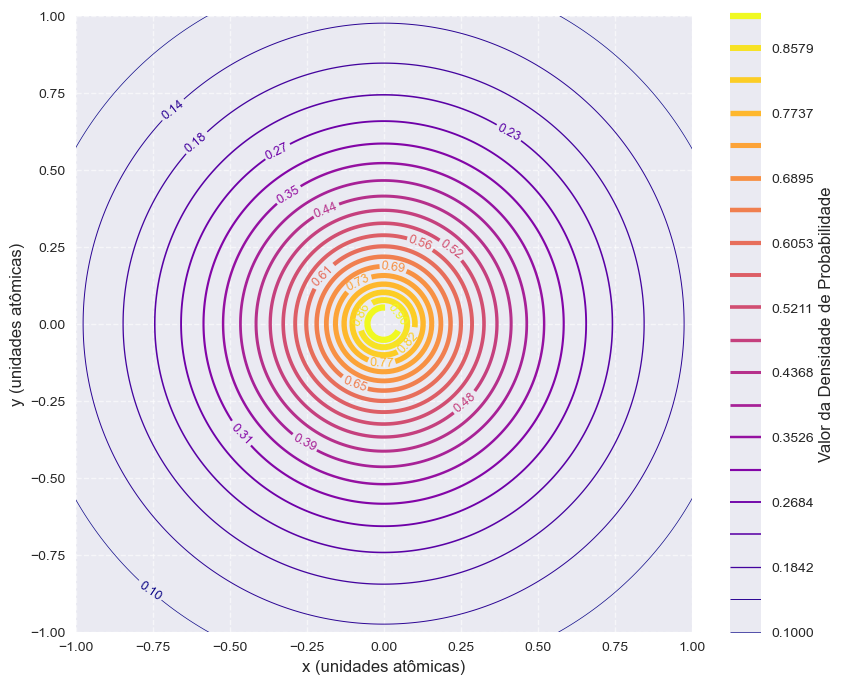

In [103]:
# 1. Definir a função de densidade de probabilidade P(x, y)
def p_xy(x, y):
    """
    Calcula a densidade de probabilidade P(x,y) = e^(-2r)
    onde r = sqrt(x^2 + y^2).
    """
    r = np.sqrt(x**2 + y**2)
    return np.exp(-2 * r)

# 2. Criar a grade (grid) de pontos para o plot
x_vals = np.linspace(-2.5, 2.5, 400)
y_vals = np.linspace(-2.5, 2.5, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# 3. Calcular o valor de P(x, y) para cada ponto da grade
Z = p_xy(X, Y)

# 4. Definir os níveis de contorno e suas respectivas espessuras
niveis = np.linspace(0.1, 0.9, 20)  # Reduzi o número de níveis para o gráfico ficar mais limpo
espessuras = niveis * 5             # Ajustei a escala das espessuras

# 5. Criar o mapa de contorno
plt.figure(figsize=(10, 8))

# Usamos plt.xlim() e plt.ylim() para definir a caixa de visualização
plt.xlim(-1., 1.)
plt.ylim(-1., 1.)

# A função contour desenha as linhas
contorno = plt.contour(X, Y, Z, levels=niveis, linewidths=espessuras, cmap='plasma')

# Adicionar um rótulo aos contornos para ver o valor de cada linha
plt.clabel(contorno, inline=True, fontsize=9, fmt='%1.2f')

# Configurações do gráfico
plt.xlabel("x (unidades atômicas)", fontsize=12)
plt.ylabel("y (unidades atômicas)", fontsize=12)

# Garantir que a escala dos eixos seja a mesma (círculos perfeitos)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True, linestyle='--', alpha=0.6)

# Adicionar uma barra de cores
cbar = plt.colorbar(contorno)
cbar.set_label("Valor da Densidade de Probabilidade", fontsize=12)

# Exibir o gráfico
plt.show()

# Exercício 3

### Método de Rumberg

In [30]:
import base64
from IPython.display import Image, display

def mm(graph):
    graphbytes = graph.encode('utf-8')
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode('ascii')
    display(Image(url="https://mermaid.ink/img/" + base64_string))

diagrama="""
graph TD
    subgraph "Fluxograma da Função integracao_romberg"
        A(["'Início da Função'"]);
        B{"'Inicializar tabela R, e h = b - a'"};
        C{"'Calcular primeira aproximação R[0, 0]<br>com a Regra do Trapézio simples'"};
        
        D{"'Laço Principal: Para k de 1 até max_iter-1'"};
        
        D -- "'Início da Iteração k'" --> E{"'Atualizar h = h / 2'"};
        E --> F{"'Calcular soma dos pontos médios<br>(Laço interno sobre i)'"};
        F --> G{"'Calcular R[k, 0] (Trapézio atualizado)<br>usando R[k-1, 0] e a nova soma'"};
        
        G --> H{"'Calcular colunas de extrapolação<br>(Laço interno sobre m)'"};
        H -- "'Para cada m de 1 a k'" --> I{"'Calcular R[k, m] com a fórmula de Richardson'"};
        I --> J{"'Fim do Laço de Extrapolação'"};

        J --> K{"'Calcular erro_estimado = |R[k, k] - R[k-1, k-1]|'"};
        K --> L{"'erro_estimado < tolerancia?'"};

        L -- "'Sim (Convergiu)'" --> M{"'Retornar R[k, k] e erro_estimado'"};
        M --> Z(["'Fim por Convergência'"]);

        L -- "'Não (Continuar)'" --> D;

        D -- "'Fim do Laço Principal<br>(max_iter atingido)'" --> N{"'Retornar o último resultado<br>R[max_iter-1, max_iter-1] e o último erro'"};
        N --> Y(["'Fim por max_iter'"]);
    end
"""

mm(diagrama)

In [19]:
import numpy as np

def integracao_romberg(funcao, a, b, max_iter=15, tolerancia=1e-10):
    """
    Calcula a integral definida de uma função 'funcao' de 'a' até 'b'
    usando o método de integração de Romberg.

    Args:
        funcao (callable): A função a ser integrada. Deve aceitar um argumento numérico.
        a (float): O limite inferior de integração.
        b (float): O limite superior de integração.
        max_iter (int): O número máximo de iterações (linhas da tabela).
        tolerancia (float): A tolerância de erro para o critério de parada.

    Returns:
        tuple: Uma tupla contendo (resultado_final, erro_estimado).
    """
    # Inicializa a tabela de Romberg (matriz R)
    R = np.zeros((max_iter, max_iter), dtype=float)
    
    h = b - a # Largura inicial do intervalo
    
    # R(0, 0): Primeira estimativa com a Regra do Trapézio (n=1 intervalo)
    R[0, 0] = 0.5 * h * (funcao(a) + funcao(b))

    for k in range(1, max_iter):
        # --- Passo 1: Calcular a primeira coluna R(k, 0) ---
        # Esta é a Regra do Trapézio Composta com 2^k intervalos.
        # Usamos uma fórmula de atualização eficiente para evitar recalcular pontos.
        h /= 2.0
        soma_pontos_medios = 0
        num_pontos = 2**k
        for i in range(1, num_pontos, 2): # Soma apenas nos novos pontos
            soma_pontos_medios += funcao(a + i * h)
            
        # Atualiza a aproximação do trapézio
        R[k, 0] = 0.5 * R[k-1, 0] + h * soma_pontos_medios
        
        # --- Passo 2: Extrapolação de Richardson para as outras colunas ---
        for m in range(1, k + 1):
            fator_extrapolacao = 4**m - 1
            R[k, m] = R[k, m-1] + (R[k, m-1] - R[k-1, m-1]) / fator_extrapolacao
            
        # --- Passo 3: Verificar o critério de parada ---
        # O erro é estimado pela diferença entre as duas últimas aproximações na diagonal
        erro_estimado = abs(R[k, k] - R[k-1, k-1])

        if erro_estimado < tolerancia:
            return R[k, k], erro_estimado

    return R[max_iter-1, max_iter-1], erro_estimado



a = 0  # Limite inferior
b = 2**(1/2)  # Limite superior
m = 1
E = 1

    
def f(x):
    return 1/((2*E/m)**(1/2)*np.sqrt(1-x**4/4+x**2/2))

result,erro = integracao_romberg(f, a, b)
    
print("\n" + "="*60)
print("--- Resultado Final ---")
print(f"Valor da Integral (Romberg): {result:.15f}")
print(f"Erro Estimado pelo Método:   {erro:.15e}")
print("="*60)


--- Resultado Final ---
Valor da Integral (Romberg): 0.941458380653073
Erro Estimado pelo Método:   2.303823798399662e-11


### Quadraturara Gaussiana

In [18]:
def quadratura_gaussiana(funcao, a, b, n):
    """
    Calcula a integral definida de uma função 'funcao' de 'a' até 'b'
    usando o método da Quadratura Gaussiana com 'n' pontos.

    Args:
        funcao (callable): A função a ser integrada. Deve aceitar um argumento numérico.
        a (float): O limite inferior de integração.
        b (float): O limite superior de integração.
        n (int): O número de pontos (ordem da quadratura).

    Returns:
        float: O valor aproximado da integral.
    """
    # 1. Obter os nós (raízes) e pesos do Polinômio de Legendre de grau n
    # A função leggauss retorna os nós no intervalo [-1, 1]
    nos, pesos = np.polynomial.legendre.leggauss(n)

    # 2. Aplicar a mudança de variável para mapear os nós do intervalo [-1, 1]
    # para o intervalo [a, b].
    # A fórmula é: t = (b-a)/2 * x + (b+a)/2
    nos_mapeados = 0.5 * (b - a) * nos + 0.5 * (b + a)

    # 3. Avaliar a função nos nós mapeados
    valores_funcao = funcao(nos_mapeados)

    # 4. Calcular a integral usando a soma ponderada
    # A integral é a soma dos pesos multiplicados pelos valores da função,
    # tudo multiplicado pelo fator de escala da mudança de intervalo.
    integral = 0.5 * (b - a) * np.sum(pesos * valores_funcao)

    return integral

def integrar_com_estimativa_erro(funcao, a, b, n_inicial=5, tolerancia=1e-9, max_iter=10000):
    """
    Calcula a integral de uma função até que a estimativa de erro seja
    menor que a tolerância especificada.

    Args:
        funcao (callable): A função a ser integrada.
        a (float): O limite inferior de integração.
        b (float): O limite superior de integração.
        n_inicial (int): O número inicial de pontos de Gauss.
        tolerancia (float): A tolerância de erro desejada.
        max_iter (int): Número máximo de iterações para evitar loops infinitos.

    Returns:
        tuple: Uma tupla contendo (resultado_final, erro_estimado, n_final)
    """
    n = n_inicial
    
    # Calcula a primeira estimativa com n pontos
    resultado_n = quadratura_gaussiana(funcao, a, b, n)

    for i in range(max_iter):
        # Dobra o número de pontos para a próxima estimativa
        n_novo = 2 * n
        
        # Calcula a estimativa mais precisa com 2n pontos
        resultado_2n = quadratura_gaussiana(funcao, a, b, n_novo)
        
        # O erro é estimado pela diferença entre as duas aproximações
        erro_estimado = np.abs(resultado_2n - resultado_n)

        # Verifica se o erro está dentro da tolerância
        if erro_estimado < tolerancia:
            return resultado_2n, erro_estimado, n_novo

        # Prepara para a próxima iteração
        resultado_n = resultado_2n
        n = n_novo
    return resultado_n, erro_estimado, n

def f(x):
    return 1/((2*E/m)**(1/2)*np.sqrt(1-x**4/4+x**2/2))

a = 0  # Limite inferior
b = 2**(1/2)  # Limite superior

n=1
epsilon = 1e-9
result, error, n_final = integrar_com_estimativa_erro(f, a, b, n_inicial=n, tolerancia=epsilon)

print(f"Quadratura Gaussiana:")
print(f"Resultado final da integral: {result:.15f}")
print(f"Erro estimado: {error:.25f}")
print(f"Número final de pontos utilizados: {n_final}")

Quadratura Gaussiana:
Resultado final da integral: 0.941458380653038
Erro estimado: 0.0000000000000008881784197
Número final de pontos utilizados: 32
